<a href="https://www.kaggle.com/code/theyazilimci/satellite-classification-cnn?scriptVersionId=93526240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Satellite Classification 🛰

<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">
<font size="3">
In This notebook we'll try to classify different satellite using convolutional neural network with tensorflow. 
<br>
    <b> Cloudy -- Desert -- Green_area -- Water 
    </b>
    </font>
</div>
    
!["satellite"](https://cap.img.pmdstatic.net/fit/https.3A.2F.2Fi.2Epmdstatic.2Enet.2Fcap.2F2021.2F07.2F31.2Ff962df85-bb35-4003-927f-8d590ff7d320.2Ejpeg/1200x630/background-color/ffffff/focus-point/93%2C552/quality/70/cr/wqkgUGl4YWJheSAvIENBUElUQUw%3D/lancement-reussi-pour-le-premier-satellite-flexible-europeen-1411002.jpg)

# Data Importation 📖

*  Tensorflow
* Numpy 
* Matplotlib
* os 
* pathlib
* random

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

### Get Class Names 
<code>class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  </code>

In [2]:
path = '../input/satellite-image-classification/data/'
data_dir = pathlib.Path(path)

In [3]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['cloudy', 'desert', 'green_area', 'water'], dtype='<U10')

### Define paths and make plotting of random images 

In [4]:
cloudyPath = os.path.join(data_dir,'cloudy')
desertPath = os.path.join(data_dir,'desert')
green_areaPath = os.path.join(data_dir,'green_area')
waterPath = os.path.join(data_dir,'water')

In [5]:
imageCount = len(list(data_dir.glob('*/*.jpg')))
imageCount

5631

## Plot 25 random Images of the satellites 

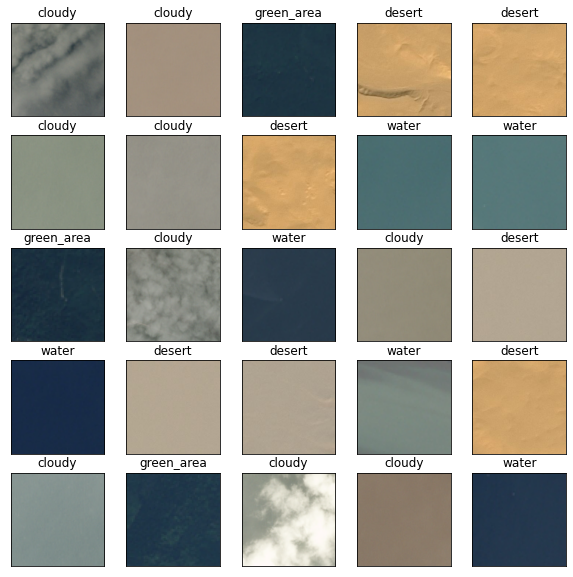

In [6]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.jpg"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

# Build The CNN
<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">
<font size="3">
Define batch_size,img_height and width then use image_dataset_from_directory to split the data into training and validation set 
    </font>
</div>

In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.


2022-04-20 10:39:26.764709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 10:39:26.853682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 10:39:26.854472: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 10:39:26.857122: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


# Define the Model
<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">
<font size="3">
The model have 3 blocks where in each block we have one convolutional layer and a max pooling 
to understand CNN you can follow this link which provide a good understanding of the subject 
<a style='color: blue' > https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 </a>
We rescale images add a Dropout to avoid the overfitting as we have 4 class the last layer contain the number of class and we have softmax as activation,it will give us a pourcentage of each class and we'll choice the maximum pourcentage as the class
    </font>
</div>

In [9]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
    
    
    
])

# Compile the Model 

In [10]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

Use GPU to fit the model else it will take much more time 

In [11]:
epochs = 10
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-04-20 10:39:31.185908: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-20 10:39:32.655957: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


141/141 [==============================] - 19s 86ms/step - loss: 0.3464 - accuracy: 0.8393 - val_loss: 0.2093 - val_accuracy: 0.9139
Epoch 2/10
141/141 [==============================] - 7s 47ms/step - loss: 0.2506 - accuracy: 0.8777 - val_loss: 0.2440 - val_accuracy: 0.8757
Epoch 3/10
141/141 [==============================] - 7s 48ms/step - loss: 0.2318 - accuracy: 0.9030 - val_loss: 0.1577 - val_accuracy: 0.9298
Epoch 4/10
141/141 [==============================] - 8s 52ms/step - loss: 0.1635 - accuracy: 0.9265 - val_loss: 0.1511 - val_accuracy: 0.9361
Epoch 5/10
141/141 [==============================] - 7s 47ms/step - loss: 0.1779 - accuracy: 0.9154 - val_loss: 0.2461 - val_accuracy: 0.8446
Epoch 6/10
141/141 [==============================] - 7s 48ms/step - loss: 0.1933 - accuracy: 0.9081 - val_loss: 0.3084 - val_accuracy: 0.8766
Epoch 7/10
141/141 [==============================] - 7s 49ms/step - loss: 0.1735 - accuracy: 0.9241 - val_loss: 0.1574 - val_accuracy: 0.9263
Epoch 8/1

# Plot Result 

In [12]:
# it return the loss and the accuracy 
model.evaluate(val_data)

36/36 [==============================] - 1s 28ms/step - loss: 0.1475 - accuracy: 0.9361


[0.14749926328659058, 0.9360568523406982]

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

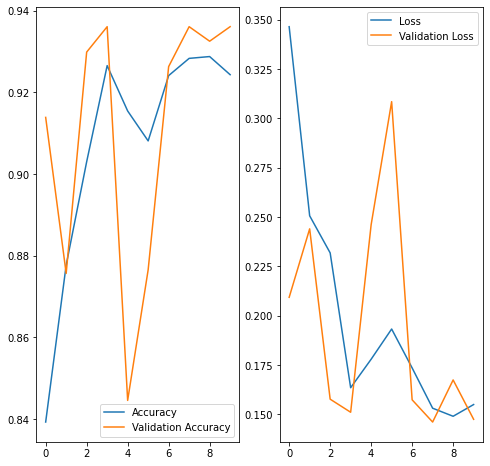

In [14]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

### We can see that the model overfit it learn to much the training data maybe because there aren't enough images so we will fit the model with less epochs to see if there any changes 

In [15]:
epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/2
141/141 [==============================] - 8s 53ms/step - loss: 0.1468 - accuracy: 0.9327 - val_loss: 0.2004 - val_accuracy: 0.9263
Epoch 2/2
141/141 [==============================] - 7s 47ms/step - loss: 0.1481 - accuracy: 0.9352 - val_loss: 0.1636 - val_accuracy: 0.9334


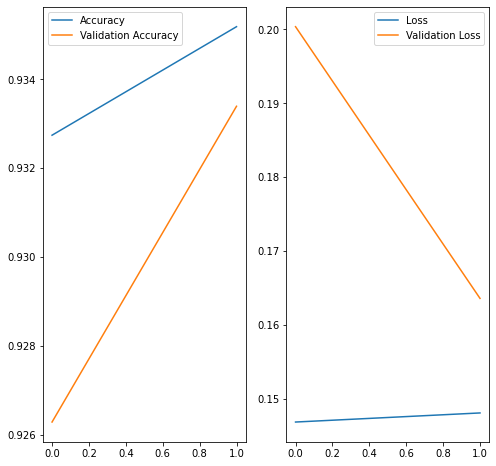

In [16]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

### Now we can see with 2 epochs that the model didn't overfit 

# Predictions 

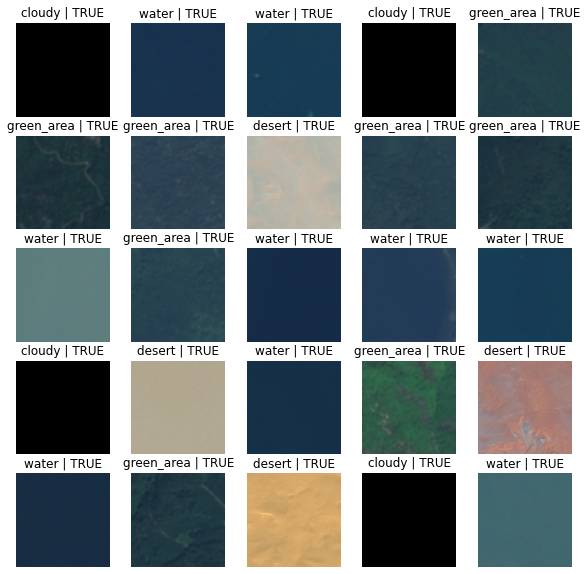

In [17]:
plt.figure(figsize=(10, 10))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")